# INFO 2950 Phase 4 (hz542, kf279)

## Introduction

## Data Description

## Preregistration Analysis

## Analysis 1

### Hypothesis

The linear model based on keywords related to politics, e.g., "Biden+covid" and "election+covid", can best predict the frequency of "Trump+covid".

### Analysis

Our first analysis will be grounded on a series of linear regression models that take in the number of times a set of keywords appear on Reddit and predict the frequency of the keyword "Trump+covid".  Our first model would look at how well "Biden+covid" and "election+covid" would be able to predict the frequency of "Trump+covid". Then, we are going to include a set of keywords unrelated to politics in our linear regression model and see whether the composition of any of the keywords can increase the prediction accuracy. The set of seemingly unrelated keywords includes but is not limited to "mask+covid", "job+covid" and "economy+covid". In the end, we will also be creating a single variable linear regression for each of the keywords to predict the frequency of "Trump+covid" and compare the results with the multivariable regression models. The final goal of this analysis is to find the best model (single variable / multivariable) that predicts the frequency of "Trump+covid", even though the model may only imply a correlational relationship but not a causational one. 

## Analysis 2

### Hypothesis

In the second analysis, we want to validate two sub-hypotheses.

1. Considering how the overall discussion about covid-19 on reddit may influence the general frequency of a keyword, we hypothesize that the "relative" frequency of a keyword, which is calculated by the frequency of the keyword (e.g. "death+covid") divided by frequency of "covid", is a better indicator of its discussion trend. 
2. Based on our knowledge about the real-world application, we think people are more "sensitive" to the ratio of daily death increases over daily positive increases. Hence, we hypothesize that the latter one is a better predictor of frequency of the keyword "death" on reddit. 

### Analysis

The keyword we choose for our second analysis is "death". We want to explore how the frequency of the keyword "death" on reddit is influenced by the overall trend in death cases. The analysis tool will still be a series of linear regression models. We decide to build the four following models: 

1. We will use daily death increases as the predictor, and our outcome will be the daily frequency of the keyword.
2. We will use daily death increases as the predictor, and our outcome will be the "relative" frequency of the keyword: ( covid_death_count / covid_count ).
3. We will use the ratio of daily death increases over daily positive increases as the predictor, and our outcome will be the daily frequency of the keyword.
4. We will use the ratio of daily death increases over daily positive increases as the predictor, and our outcome will be the "relative" frequency of the keyword: ( covid_death_count / covid_count ).

Overall, model 1 and 2 use one predictor, and model 3 and 4 use another predictor. Model 1 and 3 use the one outcome, and model 2 and 4 use another outcome. In running these four models, we expect conclusions about two questions. 

Comparing Model 1 and 3, Model 2 and 4, is covid_death_count or ( covid_death_count / covid_count ), the "relative" keyword frequency considering how the overall discussion about covid-19 may influence the keyword count, a better indicator of a keyword trend on reddit?
Comparing Model 1 and 2, Model 3 and 4, is frequency of the keyword "death" better predicted by the increase in death cases or the ratio of daily death cases over daily positive cases?

## Data Analysis

### Data Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

Here's what our cleaned data looks like. 

In [2]:
covid_df = pd.read_csv('datasheet.csv')
covid_df.date = pd.to_datetime(covid_df.date)
covid_df.head()

,date,covid_count,covid-19_count,coronavirus_count,covid_economy_count,covid_job_count,covid_cash_count,covid_money_count,covid_blm_count,covid_biden_count,...,covid_fatigue_count,covid_fever_count,covid_headache_count,covid_shortness_count,covid_smell_count,covid_sore_count,covid_taste_count,total_test_increase,death_increase,positive_increase
0,2020-03-03,6455,5381,20437,95,101,21,92,1,20,...,20,178,20,37,3,43,5,266,3,48
1,2020-03-04,6672,5561,20886,96,123,21,113,0,53,...,21,174,13,40,3,28,5,1119,2,139
2,2020-03-05,7434,6181,21201,116,108,24,113,0,35,...,15,165,14,38,5,32,6,641,4,107
3,2020-03-06,8186,6732,22031,117,148,42,158,0,31,...,24,221,24,57,2,48,6,873,6,112
4,2020-03-07,8077,6530,20570,116,115,15,120,0,27,...,12,198,13,51,7,46,8,919,1,178


A copy of our original data file, dropping the columns that are related to the number of daily cases or deaths. 

In [3]:
reddit = covid_df.drop(columns=['total_test_increase', 'death_increase', 'positive_increase'])
covid_df.head()

,date,covid_count,covid-19_count,coronavirus_count,covid_economy_count,covid_job_count,covid_cash_count,covid_money_count,covid_blm_count,covid_biden_count,...,covid_fatigue_count,covid_fever_count,covid_headache_count,covid_shortness_count,covid_smell_count,covid_sore_count,covid_taste_count,total_test_increase,death_increase,positive_increase
0,2020-03-03,6455,5381,20437,95,101,21,92,1,20,...,20,178,20,37,3,43,5,266,3,48
1,2020-03-04,6672,5561,20886,96,123,21,113,0,53,...,21,174,13,40,3,28,5,1119,2,139
2,2020-03-05,7434,6181,21201,116,108,24,113,0,35,...,15,165,14,38,5,32,6,641,4,107
3,2020-03-06,8186,6732,22031,117,148,42,158,0,31,...,24,221,24,57,2,48,6,873,6,112
4,2020-03-07,8077,6530,20570,116,115,15,120,0,27,...,12,198,13,51,7,46,8,919,1,178


We are interested in the topics that are on average most frequently discussed in the past 300 days (prior to 10/02/2020). It seems that people were talking a lot about covid tests, mask mandates, and job-related issues.   

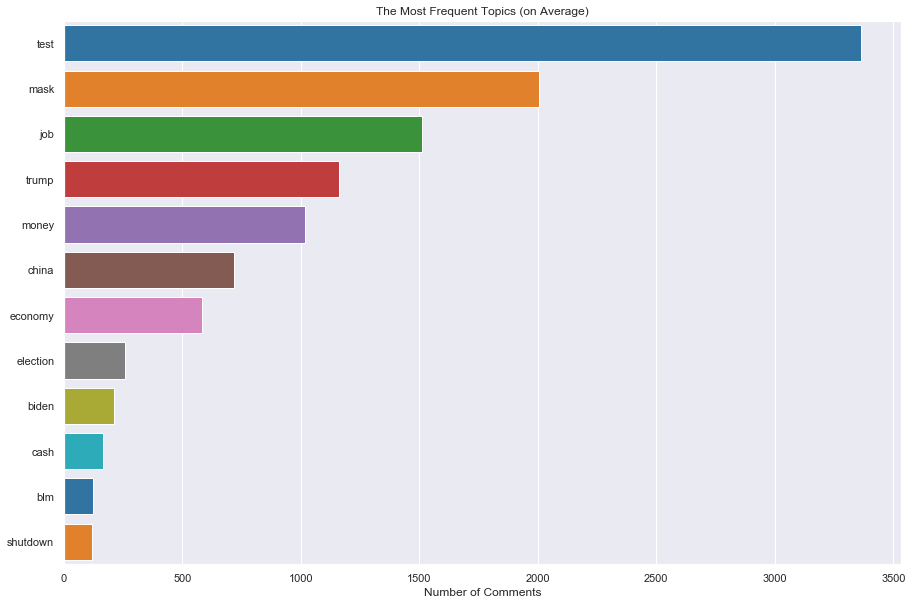

In [4]:
mean_reddit = reddit.iloc[:, :16].mean().sort_values(ascending=False)
mean_reddit.drop(labels=["covid_count", "covid-19_count", "coronavirus_count"], inplace=True)
_, ax1 = plt.subplots(figsize=(15, 10))
mean_barplot = sns.barplot(y=mean_reddit.index, x=mean_reddit, orient='h', ax=ax1, palette="tab10")
labels = mean_barplot.set_yticklabels(map(lambda x: x.split("_")[1] if len(x.split("_")) == 3 else x.split("_")[0], mean_reddit.index.tolist()))
x_label = mean_barplot.set_xlabel("Number of Comments")
title = mean_barplot.set_title("The Most Frequent Topics (on Average)")

It is also interesting to see whether the topics that are discussed the most on average are the topics most discussed on a single day. 

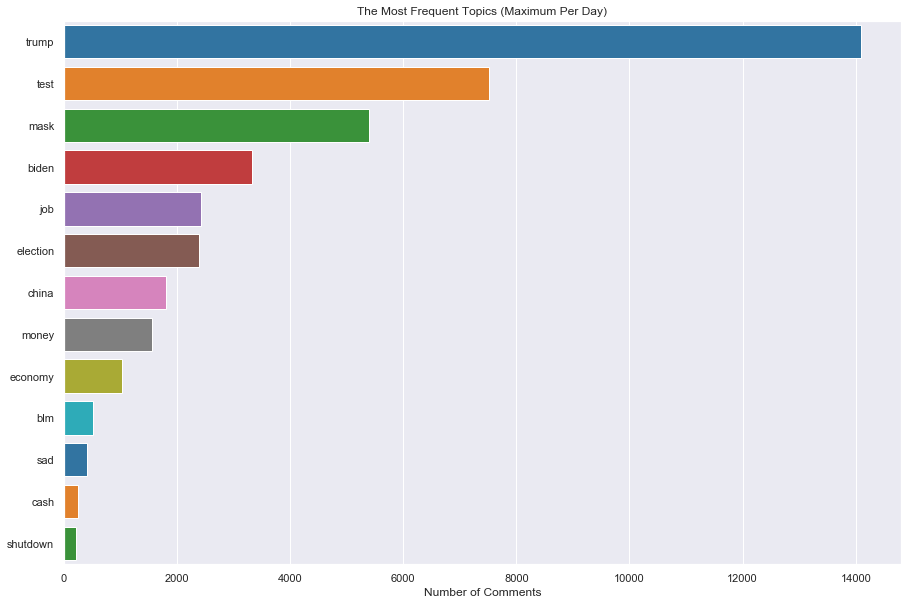

In [5]:
max_reddit = reddit.set_index('date').iloc[:, :16].max().sort_values(ascending=False)
max_reddit.drop(labels=["covid_count", "covid-19_count", "coronavirus_count"], inplace=True)
_, ax2 = plt.subplots(figsize=(15, 10))
max_barplot = sns.barplot(y=max_reddit.index, x=max_reddit, orient='h', ax=ax2, palette="tab10")
labels = max_barplot.set_yticklabels(map(lambda x: x.split("_")[1] if len(x.split("_")) == 3 else x.split("_")[0], max_reddit.index.tolist()))
x_label = max_barplot.set_xlabel("Number of Comments")
title = max_barplot.set_title("The Most Frequent Topics (Maximum Per Day)")

Based on the chart created below, it seems that **trump** is in a huge lead as compared to the rest of the keywords. This is probably a result of Trump's testing positive for covid-19 early October. 

Similarly, the ranks for *election* and *biden* have also increased. That is probably also related to Trump's diagnosis for Covid-19, and we're going to create a bunch of line charts to see whether that is true.

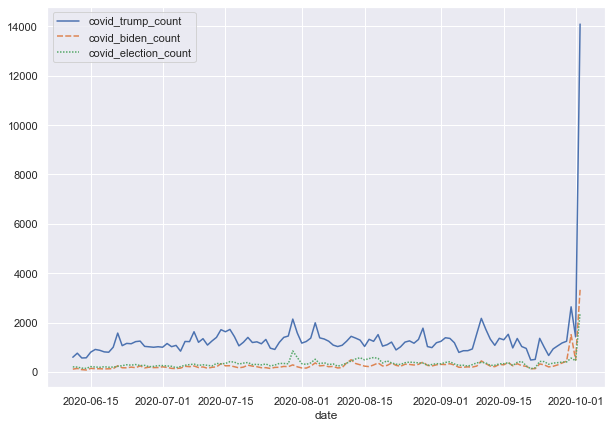

In [6]:
_, ax3 = plt.subplots(figsize=(10, 7))

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

new_result = covid_df.set_index("date").iloc[100:]
sns.lineplot(data=new_result[["covid_trump_count", "covid_biden_count", "covid_election_count"]], ax=ax3)

It is clear in the line chart that the number of comments related to Trump, Biden, and election has all skyrocketed the early October. It seems that people on reddit are really excited about Trump's diagnosis and its potential impacts on the election results (which is probably what stole the election from Trump). However, it's a tragedy that we are not able to obtain the latest data from Reddit API as they turned off the aggregate function at the start of November, as the surge in cases in November and dramatic election results would very likely produce some interesting results worthy of in-depth analysis.

---

In addition, we are interested in the relationship between reddit comments and covid cases in US.

In [7]:
covid_positive_corr = covid_df.covid_count.corr(covid_df.positive_increase)
print('Standard correlation between daily frequency of "covid" on reddit and daily positive cases is: {:.2f}'.format(covid_positive_corr))
covid_positive_rank_corr = covid_df.covid_count.corr(covid_df.positive_increase, method='spearman')
print('Rank correlation between daily frequency of "covid" on reddit and daily positive cases is: {:.2f}'.format(covid_positive_rank_corr))

Standard correlation between daily frequency of "covid" on reddit and daily positive cases is: 0.46
Rank correlation between daily frequency of "covid" on reddit and daily positive cases is: 0.40


It seems that there is no strong correlation between covid comments on reddit and daily positive cases in US. However, there are a group of outliers roughly at line y = 0, and an outlier with a very large covid_count (the day when Trump tested positive for covid). The group of outliers probably represent the scenario in March, where people were starting to have discussions on covid but the number of cases per day were still pretty low.

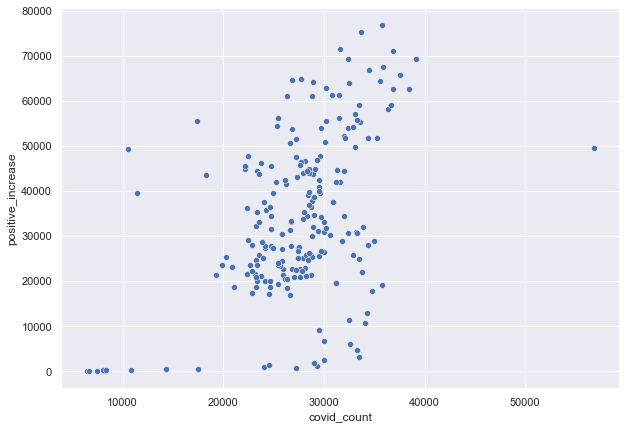

In [8]:
_, ax4 = plt.subplots(figsize=(10, 7))
sns.scatterplot(x=covid_df['covid_count'], y=covid_df['positive_increase'], ax=ax4)

So what if we drop the first 30 rows of the dataframe when the covid cases have not yet surged but people have started talking about covid? How will this change the $r^2$ score for this correlation pattern?

In [9]:
new_covid_df = covid_df.iloc[30:]
new_covid_positive_corr = new_covid_df.covid_count.corr(new_covid_df.positive_increase)
print('Standard correlation between daily frequency of "covid" on reddit and daily positive cases is: {:.2f}'.format(new_covid_positive_corr))
new_covid_positive_rank_corr = new_covid_df.covid_count.corr(new_covid_df.positive_increase, method='spearman')
print('Rank correlation between daily frequency of "covid" on reddit and daily positive cases is: {:.2f}'.format(new_covid_positive_rank_corr))

Standard correlation between daily frequency of "covid" on reddit and daily positive cases is: 0.47
Rank correlation between daily frequency of "covid" on reddit and daily positive cases is: 0.52


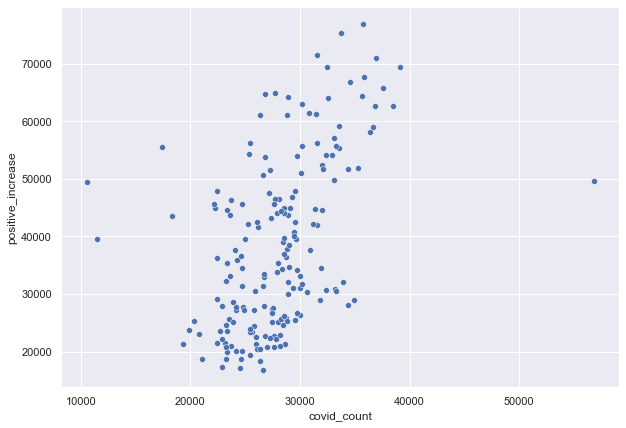

In [10]:
_, ax5 = plt.subplots(figsize=(10, 7))
sns.scatterplot(x=new_covid_df['covid_count'], y=new_covid_df['positive_increase'], ax=ax5)

And remove the far-right outlier. 

In [11]:
max_index = new_covid_df['covid_count'].idxmax()
new_covid_df = new_covid_df.drop(index=max_index)

In [12]:
new_covid_positive_corr = new_covid_df.covid_count.corr(new_covid_df.positive_increase)
print('Standard correlation between daily frequency of "covid" on reddit and daily positive cases is: {:.2f}'.format(new_covid_positive_corr))
new_covid_positive_rank_corr = new_covid_df.covid_count.corr(new_covid_df.positive_increase, method='spearman')
print('Rank correlation between daily frequency of "covid" on reddit and daily positive cases is: {:.2f}'.format(new_covid_positive_rank_corr))

Standard correlation between daily frequency of "covid" on reddit and daily positive cases is: 0.50
Rank correlation between daily frequency of "covid" on reddit and daily positive cases is: 0.52


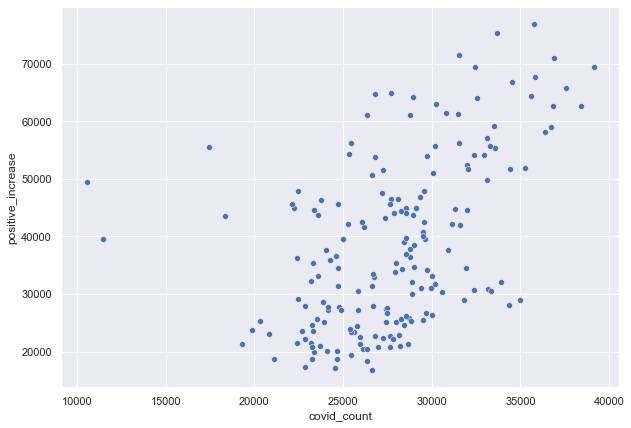

In [13]:
_, ax6 = plt.subplots(figsize=(10, 7))
sns.scatterplot(x=new_covid_df['covid_count'], y=new_covid_df['positive_increase'], ax=ax6)

## Evaluation of Significance

## Interpretation and Conclusions

## Limitations

## Source Code

All of our source code and commit history can be found at https://github.com/kaiyue95/INFO-2950-Final-Project. 

## Acknowledgements

## Appendix: Data Cleaning Description

Submit an updated version of your data cleaning description from phase II that describes all data cleaning steps performed on your raw data to turn it into the analysis-read dataset submitted with your final project. The data cleaning description should be a separate Jupyter notebook with executed cells, and it should output the dataset you submit as part of your project (e.g. written as a .csv file).